# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [3]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: The dimensions generated by PCA would represent which types of customers are mostly variant to the changes the company makes. In a technial sense, PCA aims to find a dimension that mostly explains variances of data. Because principal components are represetend by a n-dimensional vector, we can figure out which dimension (i.e., customer type) is important for each principal component. Moreover, we can figure out which types of customers are correlated with one another. Thus, it would help to understand the data itself. On the other hand, ICA finds hidden variables that combine types of customers. Each hidden variable (i.e., ICA dimension) is independent with one another, and each type of customer is represented as a linear combination of the hidden variables. I would say each independent component represents a distnct characteristic of customers. If it is assumed that Fresh and Milk types of customers have a common characteristic, the two types would have high values for the ICA dimension which may indicate the common characteristic.

###PCA

In [4]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
from sklearn import preprocessing
data_scaled = preprocessing.scale(data)
pca.fit(data_scaled)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.04288396 -0.54511832 -0.57925635 -0.05118859 -0.5486402  -0.24868198]
 [-0.52793212 -0.08316765  0.14608818 -0.61127764  0.25523316 -0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [ 0.04868278 -0.82657929  0.31499943  0.02793224  0.33964012  0.31470051]
 [ 0.03602539  0.03804019 -0.72174458  0.01563715  0.68589373  0.07513412]]
[ 0.44082893  0.283764    0.12334413  0.09395504  0.04761272  0.01049519]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: I would choose the number of dimensions as two. The amount of explained variances significantly drops when the number of dimensions becomes three.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: Those dimensions explains variances for data across types of customers. That is, PCA can figure out which types of customers are mostly variant. We can utilize this information to understand characteristics of each type of customers. If a type shows high varainces and it is represented at the first princial component, the company should be careful to run a campaign on the type of customers. However, it is not enough to only rely on PCA to get a business decision. It can be useful as pre-processing steps before conducting further analyses such as clustering and classification.

###ICA

In [27]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit(data_scaled)

# Print the independent components
print ica.components_

[[ 0.01091711  0.00107094 -0.00728599 -0.05405397  0.00255931  0.01675539]
 [ 0.00489927  0.00154713  0.00562301  0.0025296  -0.00235671 -0.0509333 ]
 [ 0.00351489 -0.01757943 -0.11147019  0.00716808  0.13393     0.01599611]
 [ 0.00260748 -0.01251809  0.06580972  0.00164968 -0.00994746 -0.00504424]
 [ 0.00186545  0.07269375 -0.05565707 -0.00175421  0.01584118 -0.01707866]
 [-0.05025401  0.00636487  0.00701997  0.00324652 -0.01092021  0.00279748]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: ICA decomposition finds vectors that are independent with one another. In this data, each type of customer is a linear combination of independent vectors. Each independent vector can be thought as hidden characteristics that explains each type of customer. 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: The strength of K-means clustering is its simplicity. If we set K as the number of clusters, the algorithm finds K clusters quickly. Because the algorithm is simple, it runs quickly but works well in many situations. Weakness of K-means clusters also result from its simplicity. Because it is a 'hard' clustering, each data point is only able to have one membership. Therefore, the results of K-means are volatile and easy to be changed. On the other hand, Gaussian Mixture Models overcome the limitation of K-means clustering. It works as 'soft' clustering. Thus, each point can have multiple probabilities to be from one of Gaussian distributions. Those probabilities give us more understandings on how each point is likely to be one of the clusters. However, it requires too much computations to find probabilities of each point to belong each cluster; that is, it is slow.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [6]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [9]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = np.dot(data_scaled, pca.components_[:2].T)
print reduced_data[:10]  # print upto 10 elements

[[-0.19329055  0.30509996]
 [-0.4344199   0.32841262]
 [-0.81114323 -0.8150957 ]
 [ 0.77864783 -0.65275373]
 [-0.16628726 -1.27143372]
 [ 0.15616993  0.29514099]
 [ 0.3352884   0.52500326]
 [-0.14058643  0.23099269]
 [ 0.51731954  0.65936283]
 [-1.59210908  0.74101133]]


In [23]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
from sklearn import mixture
np.random.seed(1)
clusters = mixture.GMM(n_components=4)
clusters.fit(reduced_data)

print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [24]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [25]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids = np.round(clusters.means_, 2)
print centroids

[[-0.68  0.62]
 [ 0.83 -0.09]
 [-5.93  1.02]
 [-1.18 -2.89]]


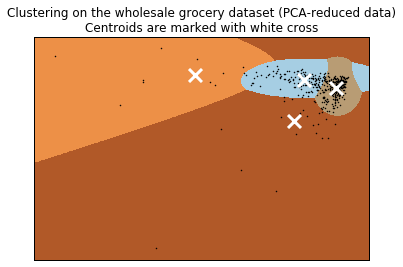

In [26]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: Central objects in each cluster show representative customer characteristics of each cluster. Looking into PCs' values for central objects can give understandings of representative customer of each cluster. Because PCs are composed of types of customers (e.g., Fresh, Milk), we could say one cluster is more likely to buy Milk while another cluster tends to buy Delicatessen.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data? 

Answer: For the data itself, I feel PCA is useful. For business perspectives, it may be more important to decide customer types through clustering. But PCA lets me know which dimensions show highest variances on the data. Moreover, it is useful to know what types of customers are correlated with each other. Thus, I feel PCA gives the most insight into the data.

**9)** How would you use that technique to help the company design new experiments?

Answer: For the company, it would be useful to use clustering techniques. PCA is useful to get a sense of data, but it is not enough for the company to use the information for business perspectives. By using PCs as we did above, we could run a clustering algorithm for the company to design new experiments. Clustering finds distinct types of customers. After finding the clusters, then we could conduct a series of questionnaire surveys to figure out characteristics of customers on each cluster. For example, by sampling a subset of users of each cluster, the company could ask them about their informations that would be useful for the company, such as demographics and living locations. Those information help to decide each type of customers that is found by clustering algorithms.

**10)** How would you use that data to help you predict future customer needs?

Answer: If we assume that the company conduct surveys to get information of each cluster, then we could try to predict types (i.e., clusters) of unknown customers based on those information. Because we already have knowledges on what types of users (e.g., demographics) are likely to belong to one of clusters and what each cluster of users tends to buy which product types, the company can predict their customer needs in advance.